## Summer 2021 CS559: Homework #1

Assignment #1: due on **6/10/2021 by 11:59 PM**. 
- Before you start, rename the file as *LastNameFirstName*_S21_CS559_HW1. (e.g., JangInsuk_S21_CS559_HW1). 
- Submit the assignment both in format of *ipynb* and *html*. 
    - Export the file as *HTML* as `File`>`Download as`>`HTML`. 
    - Do not need to print results of middle-process work. Only the final answers must be printed while all lines must be excuted. 
    - Clean up unnecessary lines and codes with errors. 
    - Use *Markdown* to explain answers and results. 
    - **Do not need to compress** the files. You can submit files individually.
    - Only one time submission is allowd 
- This assignment focuses on topics of linear algebra, probability theory, and EDA. 
    - For linear algebra questions, when the question says "implement", you are not allowed to use any built-in functions from `NumPy` or similar libraries that do the job. (e.g., if the question is to implement dot prodcut function, do not use `numpy.dot`). 
- This assignment should an individual work. Do not collaborate with classmates or get help from 3rd person. You may surf internet if you need to. Then site the reference. 

### Problem 1 [10 pts]
1-a: **Implement** a function `dot_product` to calculate the dot product of two 1 by n arrays. [6 pts] 
$$\vec{a}\cdot\vec{b}=\sum_{i}^{n}a_ib_i$$
- if there are two vectors **a**=[1,2,3,4] and **b**=[2,3,4,5] are
    then `dot_product(a,b)` = 40. 


In [1]:
import numpy as np

In [2]:
def dot_product(a,b):
    ### Code Starts Here
    result = 0;
    for x in range(len(a)):
        result+= a[x]*b[x]
    return(result)


The Dot Product of a and b is the sum of a[i] times b[i], and since I know both arrays have dimensions 1 by n, I made a for loop from 0 to n-1 (for indexing purposes). Both arrays have length n so I do not care which array's length I use. Then I added a[i] times b[i] to a result variable until the arrays ended and I returned result.

In [3]:
a=[1,2,3,4]
b=[2,3,4,5]
dot_product(a,b)

40

For Testing purposes, I made arrays a and b and ran my function on them, producing the expected output of 40.

1-b: Generate two random 1 by 10 vectors, $\vec{x}$  and $\vec{y}$, using `np.random.randinit()` and find $z$, the dot product between $\vec{x}$  and $\vec{y}$. [3 pts]

In [4]:
### Code Starts Here
np.random.seed(123)
x=np.random.randint(11,size=10)
y=np.random.randint(11,size=10)

I used np.random.int() with reference to https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html in order to create two random 1 by 10 arrays, with an arbitrary upper bound set at 11 exclusive.

In [5]:
print(x, y)

[ 2  2  6  1  3 10  9  6  1  0] [1 9 0 0 9 3 4 0 0 4]


In [6]:
z=dot_product(x,y)

1-c:Test if $z$ in 1-b is same as the result using `np.dot()`. The answer should be printed either **True** or **False**. [1 pt]

In [7]:
### Code Starts Here
z == np.dot(x,y)

True

I print True if z is equivalent to np.dot(x,y), and False otherwise.

### Problem 2 [20 pts]
2-a: Implement a function `mat_product` to calculate the matrix product of two n by n arrays. [8 pts] 
$$C_{ij}=\sum_{i,j,k=1}^nA_{ik}B_{kj}$$

In [8]:
### Code Starts Here
def mat_product(A,B):
    C = [[0 for x in range(len(A))] for y in range(len(B[0]))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(A)):
                C[i][j] += A[i][k] * B[k][j];
    return C

I started by making a result matrix C with dimensions ij, or A's outer length (i) by B's inner length (j). I then made 3 for loops, the outermost one to iterate down A's rows, the second to iterate across B's columns, and the third to iterate across each element within. Then I simply assign the result of the element multiplication to the corresponding position in the result matrix. When I finish the iterations, I return the final product matrix.

2-b Generate two random 3 by 3 matrices, ${\bf X}$ and ${\bf Y}$, whose elements are from 0 to 10. Print the result. [4 pts]

In [9]:
### Test Starts Here
np.random.seed(123)
X=np.random.randint(11, size= (3, 3))
Y=np.random.randint(11, size= (3, 3))
print(X)
print(Y)

[[ 2  2  6]
 [ 1  3 10]
 [ 9  6  1]]
[[0 1 9]
 [0 0 9]
 [3 4 0]]


I set an upperbound of 11 exclusive and then generated 9 numbers in the shape of a 3x3 matrix for X and Y and then printed them.

In [10]:
Z = mat_product(X,Y)
# Format the output into a 3x3 shape
Z = np.reshape(Z,(3,3))
# My output
print(Z)
print("Should be equal to:")
# numpy's implementation
print(np.matmul(X,Y))

[[ 18  26  36]
 [ 30  41  36]
 [  3  13 135]]
Should be equal to:
[[ 18  26  36]
 [ 30  41  36]
 [  3  13 135]]


I tested my implementation of mat_product on matrices X and Y and outputted the result to matrix Z. I then formatted Z for visualization purposes and compared Z to numpy's matmul() on X and Y to ensure I've done it correctly.

2-c Inplement a function `mat_transpose()` that transposes ${\bf X}$ and use the `mat_product` function to find the matrice of product: $Z={\bf X}^T\cdot{\bf Y}$. Compare the result with using `np.matmul()`. [8 pts]


In [11]:
### Code Starts Here
def mat_transpose(X):
    Y = [[0 for x in range(len(X))] for y in range(len(X[0]))]
    for x in range(len(X)):
        for y in range(len(X[0])):
            Y[y][x] = X[x][y]
    return Y

I create a result matrix Y to act as X transposed, and then iterate through X, assigning each element from X to its mirrored position in Y. Then simply return Y to get X transposed.

In [12]:
print(X)
X_t = mat_transpose(X)
X_t = np.reshape(X_t,(3,3))
print("Should be mirrored along the major diagonal:")
print(X_t)

[[ 2  2  6]
 [ 1  3 10]
 [ 9  6  1]]
Should be mirrored along the major diagonal:
[[ 2  1  9]
 [ 2  3  6]
 [ 6 10  1]]


Test mat_transpose(X)

In [13]:
print("-- Product of X_t and Y --")
Z=mat_product(X_t,Y)
Z = np.reshape(Z,(3,3))
print(Z)
print("Should be should be equal to:")
print(np.matmul(X.T,Y))

-- Product of X_t and Y --
[[ 27  38  27]
 [ 18  26  45]
 [  3  10 144]]
Should be should be equal to:
[[ 27  38  27]
 [ 18  26  45]
 [  3  10 144]]


### Problem 3 [15 pts]
3-a: Create a simulatior `coin_prob(pi,n,k)` for $n$ fair coins (whose probability is $\pi=0.5$) flipping $N$ times with the number of trials increase by the intervals of 50, $t=50,100,150,200,\cdots,10000$, having $k$ number of heads. [10 pts]

   - Use the sample data to compute the maximum likelihood estiamte probabilty $s$, `np.random.binomial()`, of $\pi$.
   - Have the simulator return the result of $t$ and $s$ as a data frame "ProbTable". [8 pts]
   

In [14]:
### Code Starts Here
import pandas as pd
import numpy as np

# pi = probability of head, 
# n = number of coins to be flipped, 
# N = number of times running the experiment
# t = number of trials within each experiment, defined as N*50
# k = number of heads we want to see
# s = the probability that maximizes the likelihood of getting k heads

def coin_prob(pi,n,k):
    """
    Simulator to calculate a probability of n coins 
    flipping N times with t trials having k number of heads: head (=1)
    """
    S = list()
    T = list()
    
    for N in range(1,201):
        t = N*50
        T.append(t)
        s = sum(np.random.binomial(n,pi,(N*50))==k)/(N*50)
        S.append(s)
    
    ProbTable = pd.DataFrame({'S':S,'T':T})
    return ProbTable

I created two lists, S and T. S stores a list of the number of heads (k) divided by the number of tosses (t=N*50) for N from 1 to 200. T stores a list of the number of tosses for N from 1 to 200, which yields a list from 50 to 10000 incrementing by 50.

Then I put both into ProbTable as columns and returned ProbTable.

3-b: Test the simulator when $n=1$ and $k=1$. Plot the estimates of $\pi$ as a function of sample size. Indicate the expected probability using a horizontal line. [2 pts]

In [15]:
one_coin=coin_prob(pi=.5,n=1,k=1)
one_coin.head(10)

,S,T
0,0.420000,50
1,0.460000,100
2,0.486667,150
3,0.510000,200
4,0.552000,250
5,0.516667,300
6,0.480000,350
7,0.502500,400
8,0.504444,450
9,0.512000,500


I set n and k to 1, with a pi = .5, and showed the first 10 experiments where s tends towards pi as T increases.

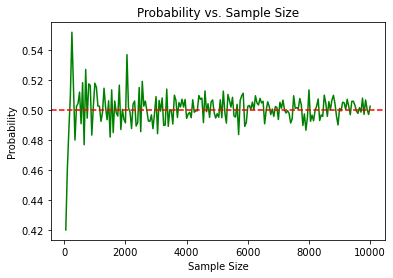

In [16]:
### Code Starts Here
import matplotlib.pyplot as plt

plt.plot(one_coin['T'], one_coin['S'], 'g-')
plt.axhline(y=.5, color='r', linestyle='--')
plt.xlabel('Sample Size')
plt.ylabel('Probability')
plt.title('Probability vs. Sample Size')
plt.show()

Set the sample size (column 'T') to the x axis, and the probability (column 'S') to the y axis. Then I created a horizontal line set at y = .5 to emphasis the line that s is trending towards with an expectedly decreasing variance as the sample size increases.

3-c: Calculate the probability of having **1 head ($k=1$)** when 3 coins are flipped. Report the expected value.  [2 pts]

In [17]:
import math as m
p1head = m.comb(3,1)*((.5)**1)*((1-.5)**2) #equals 0.375 or 3/8

p1head

0.375

The probability of having 1 head when 3 coins are flipped can be found by using the binomial distribution formula P(k=1|n=3) = nCk * (pi)^k * (1-pi)^n-k. Plugging in 3 for n, 1 for k, and .5 (fair coin) for pi yields 0.375, as shown.

3-d: Evaluate your answer in 3-c using the simulator. Show a plot that supports your evaluation. [3 pts]

In [18]:
three_coins=coin_prob(pi=.5,n=3,k=1)

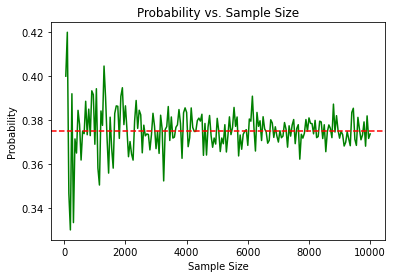

In [19]:
"""Plot shows here"""
import matplotlib.pyplot as plt

plt.plot(three_coins['T'], three_coins['S'], 'g-')
plt.axhline(y=.375, color='r', linestyle='--')
plt.xlabel('Sample Size')
plt.ylabel('Probability')
plt.title('Probability vs. Sample Size')
plt.show()

Similarly to 3b, the probability trends towards the calculated probability, in this case y = 0.375, as the sample size increases.

### Problem 4 [30 pts]

Load the Gross Domestic Product data for the 190 ranked countries in the file **GDP.csv**. Load **Country.csv** into a DataFrame. 

In [20]:
gdp = pd.read_csv('GDP.csv', skiprows=range(5), header= None, usecols=[0,1,3,4], nrows=190,encoding='ISO-8859-1')
gdp.columns = ['CountryCode', 'Rank', 'CountryName', 'GDP']
Country = pd.read_csv('Country.csv',encoding='ISO-8859-1')

4-a: Match the `CountryCode` and merge two data frames. Call the new data frame as `Country_GDP`. How many of the IDs match?
Use the link for hints: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html [5 pts]

In [21]:
### Code Starts Here
# Match CountryCode from gdp and from Country
Country_GDP = pd.merge(gdp, Country, on='CountryCode')
Country_GDP

,CountryCode,Rank,CountryName,GDP,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,...,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,2-alpha code,WB-2 code,Table Name,Short Name
0,USA,1,United States,"16,244,600",United States of America,High income: OECD,North America,NaN,NaN,U.S. dollar,...,LFS 2000,Yes,1997/2002,2004.0,2008.0,2000.0,US,US,United States,United States
1,CHN,2,China,"8,227,103",People's Republic of China,Lower middle income,East Asia & Pacific,IBRD,NaN,Chinese yuan,...,"IHS, 2005",NaN,1997,2005.0,2008.0,2000.0,CN,CN,China,China
2,JPN,3,Japan,"5,959,718",Japan,High income: OECD,East Asia & Pacific,NaN,NaN,Japanese yen,...,"IS, 1993",Yes,2000,2004.0,2008.0,2000.0,JP,JP,Japan,Japan
3,DEU,4,Germany,"3,428,131",Federal Republic of Germany,High income: OECD,Europe & Central Asia,NaN,Euro area,Euro,...,"IHS, 2000",Yes,1999-2000,2004.0,2008.0,2000.0,DE,DE,Germany,Germany
4,FRA,5,France,"2,612,878",French Republic,High income: OECD,Europe & Central Asia,NaN,Euro area,Euro,...,"ES/BS, 1994/95",Yes,1999-2000,2004.0,2008.0,2000.0,FR,FR,France,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,STP,186,São Tomé and Principe,263,Democratic Republic of São Tomé and Principe,Lower middle income,Sub-Saharan Africa,IDA,HIPC,São Tomé and Principe dobra,...,PS 2000-01,NaN,NaN,NaN,2008.0,NaN,ST,ST,São Tomé and Principe,São Tomé and Principe
185,PLW,187,Palau,228,Republic of Palau,Upper middle income,East Asia & Pacific,IBRD,NaN,U.S. dollar,...,NaN,Yes,NaN,NaN,NaN,NaN,PW,PW,Palau,Palau
186,MHL,188,Marshall Islands,182,Republic of the Marshall Islands,Lower middle income,East Asia & Pacific,IBRD,NaN,U.S. dollar,...,NaN,NaN,NaN,NaN,NaN,NaN,MH,MH,Marshall Islands,Marshall Islands
187,KIR,189,Kiribati,175,Republic of Kiribati,Lower middle income,East Asia & Pacific,IDA,NaN,Australian dollar,...,NaN,NaN,NaN,NaN,2005.0,NaN,KI,KI,Kiribati,Kiribati


I called pd.merge() to merge the two datasets together, combining them on the Country Codes. I then called Country_GDP to ensure everything worked properly.

In [22]:
### Print the number of IDs
len(Country_GDP.index)

189

The length of the index column of the new dataframe reveals how many of the Country Codes matched.

4-b: Use visualization to determine the number of countries by `Region`. Which region has the largest number of countries? [5 pts]

Europe & Central Asia has the largest number of countries at 50


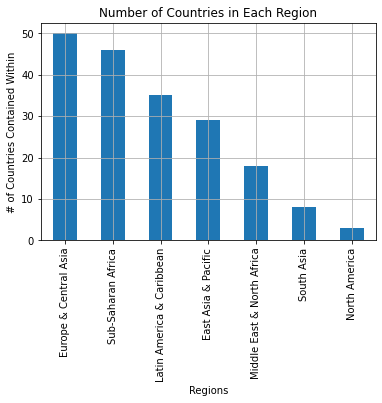

In [23]:
### Code Starts Here
# Visualize as a bar graph
Country_GDP["Region"].value_counts().plot(kind="bar",grid=True)
plt.xlabel('Regions')
plt.ylabel('# of Countries Contained Within')
plt.title('Number of Countries in Each Region')
# Europe & Central Asia has the largest number of countries at 50
print("Europe & Central Asia has the largest number of countries at 50")

I decided to visualize the number of countries by region as a bar graph, and so I used value_counts() to accumulate the total number by region, and plotted the result with a grid to better understand the total that each bar represents.

I also labeled the x and y axis and gave the plot a title. As stated above the plot, Europe & Central Asia has the most countries with a total of 50.

4-c: Visualize the distribution of GDP by `Region` to make descrete statistic analysis. Explain your findings. [5 pts]

In [24]:
### Code Starts Here
import seaborn as sns
# Correctly Format Country_GDP.GDP to get rid of commas and spaces in order to convert to numbers
S = list()
for gdp in Country_GDP.GDP:
    new_gdp = gdp.replace(',','')
    new_gdp = new_gdp.replace(' ','')
    S.append(new_gdp)
S = pd.Series(S)
S = pd.to_numeric(S)
Country_GDP.GDP = S

<AxesSubplot:xlabel='GDP', ylabel='Region'>

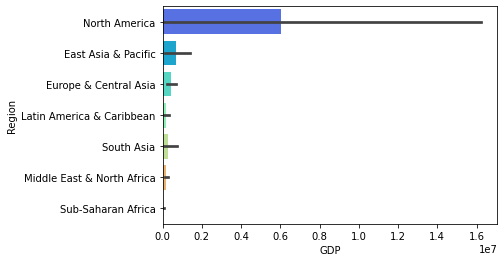

In [25]:
sns.barplot(y='Region',x='GDP',data=Country_GDP,palette='rainbow')

In order to plot GDP numerically, I had to create a list S that would take in the contents under column 'GDP' and format out the commas and extra spaces. Once I accomplished that, I set up a bar plot for Region and GDP to show the barplots of each region next to one another.

Since North America only contains three countries (USA, Canada, and Mexico) and the US has the highest GDP in the world (Canada also has a very high GDP relative to the rest of the world), NA has a very large bar but with a significantly larger error bar. This is because since the sample is so small, there is a lot of potential variance. Since each country significant affects the outcome, the confidence interval must be very large to account for this.

The other regions have much smaller bars since there are many more and many low-GDP countries contained within those regions. This means any high-GDP countries within the region make a less significant impact on the final output, which also means the error bars will be much smaller.

Discrete Statistic Analysis: (made with grouping by Region, grabbing that regions GDPs, and performing built in functions on them through agg())

In [26]:
Country_GDP.groupby('Region')['GDP'].agg([pd.DataFrame.mean,pd.DataFrame.std,pd.DataFrame.median])

mean      3.795965e+05
std       1.454854e+06
median    2.824200e+04
Name: GDP, dtype: float64

The median of North America is insanely high relative to the other regions. This is because there are only three countries in NA, the USA, Canada, and Mexico. USA ranks number 1 on world GDP according to the data, and Canada is not too far behind. Mexico is somewhere below that. However, since the median is solely the middle value, Canada represents the median and as a result its value is over 10x that of the next highest: the median value in Middle East & North Africa.

The mean of most regions are pretty similar. Notably, the Sub-Saharan Africa region has a mean GDP roughly 1/6x that of the next-lowest mean GDP, while North America has a mean GDP roughly 9x that of the next-highest mean GDP.

However, North America also has a standard deviation that is roughly 5x that of the next highest std, reinforcing the idea of a very high variance in NA. Meanwhile, Sub-Saharan Africa has a relatively miniscule standard deviation of approximately 6.77x10^4, which is over two magnitudes smaller than that of North America at approximately 8.90x10^6. This means that Sub-Saharan Africa has significantly less variance.

4-d: Test how GDPs are alike between regions using two-sample **Kolmogorov-Smirnov** test `ks_2samp()`. Make a data table show $KS-test$ and $p-$ values. Evalueate the result. Expian which regions have similar distributions. [5 pts]

In [27]:
### Code Starts Here
from scipy.stats import ks_2samp
import numpy as np

regions = Country_GDP["Region"].unique()
arr = np.array(regions)
for i in range(len(regions)):
    regions[i] = Country_GDP.loc[Country_GDP['Region']==regions[i]].GDP

ksTest = list()
pVals = list()
for i in range(len(regions)):
    for j in range(len(regions)):
        result = ks_2samp(regions[i],regions[j])
        ksTest.append(result[0])
        pVals.append(result[1])
        
ksTest = np.reshape(ksTest,(7,7))
pVals = np.reshape(pVals,(7,7))

ks = pd.DataFrame(ksTest,columns=arr,index=arr)
pvalues = pd.DataFrame(pVals,columns=arr,index=arr)
ks

,North America,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,South Asia,Middle East & North Africa,Sub-Saharan Africa
North America,0.000000,0.597701,0.566667,0.638095,0.541667,0.666667,0.666667
East Asia & Pacific,0.597701,0.000000,0.379310,0.213793,0.344828,0.496169,0.370315
Europe & Central Asia,0.566667,0.379310,0.000000,0.305714,0.260000,0.244444,0.573043
Latin America & Caribbean,0.638095,0.213793,0.305714,0.000000,0.214286,0.515873,0.325466
South Asia,0.541667,0.344828,0.260000,0.214286,0.000000,0.444444,0.489130
Middle East & North Africa,0.666667,0.496169,0.244444,0.515873,0.444444,0.000000,0.792271
Sub-Saharan Africa,0.666667,0.370315,0.573043,0.325466,0.489130,0.792271,0.000000


I started by grabbing each unique value from the 'Region' column and storing them into regions. As a side note, I also grabbed an array version of regions to use for the columns and index of the table. 

Then I grabbed the GDPs of all the countries that had the Region that matched region[i], and stored those GDPs as a list within region[i], overwriting the old value that was the name of the region. I did this for every valid region, and then created a double for-loop to run every pair of regions through ks_2samp. I stored the results of each ks_2samp call in the 'ksTest' and 'pVals' lists, storing the ks statistic and p-values accordingly.

Then I reshaped the lists into 7x7 tables and displayed them above and below with the labels coming from the array version I grabbed earlier.

In [28]:
pvalues

,North America,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,South Asia,Middle East & North Africa,Sub-Saharan Africa
North America,1.000000,0.190323,2.247930e-01,0.124229,0.424242,1.443609e-01,9.194529e-02
East Asia & Pacific,0.190323,1.000000,6.763548e-03,0.396412,0.358175,4.786941e-03,1.055858e-02
Europe & Central Asia,0.224793,0.006764,1.000000e+00,0.033283,0.646914,3.449642e-01,7.469277e-08
Latin America & Caribbean,0.124229,0.396412,3.328327e-02,1.000000,0.865937,2.319415e-03,2.186826e-02
South Asia,0.424242,0.358175,6.469144e-01,0.865937,1.000000,1.710646e-01,5.121757e-02
Middle East & North Africa,0.144361,0.004787,3.449642e-01,0.002319,0.171065,1.000000e+00,1.191943e-08
Sub-Saharan Africa,0.091945,0.010559,7.469277e-08,0.021868,0.051218,1.191943e-08,1.000000e+00


Here we can see the ks_2samp() of every country compared with every other country. Notice the table is symmetrical along the major diagonal as ks_2samp(A,B) returns the same result as ks_2samp(B,A).

From our understanding of the ks_2samp test: If the KS statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

This is consistent with our results of ks_2samp(A,A) as identical distributions yield a KS statistic equal to 0 and p-value equal to 1. Continuing this, some of the regions (that are not tested against themselves) that yield the most-similar distributions are: 

(Latin America & Carribean, South Asia) with a (ks,p-value) of (0.214286,0.865937), 

(South Asia, Europe & Central Asia) with a (ks,p-value) of (0.260000,0.646914),

(Latin America & Carribean, East Asia & Pacific) with a (ks,p-value) of (0.213793,0.396412), and

(Middle East & North Africa, Europe & Central Asia) with a (ks,p-value) of (0.244444,0.3449642)

All of these matches contain relatively low ks values and relatively high p-values, meaning these matches have the most similar distributions out of the set.

We should exercise caution with pairs including North America. Since NA has a very small sample size, the p-values may tend to be higher even when the ks statistic is not be especially low, meaning the distributions may not be very similar but we might not have enough information to reject the hypothesis that the distributions of the two samples are the same.


4-e: Sort the data frame in descending order by GDP rank. What is the 13th country in the resulting data frame? (Note: GDP formats as 123,456,789.) [5 pts]

In [29]:
### Code Starts Here
rev_rank = Country_GDP.sort_values(by='Rank',ascending=False)
rev_rank.iloc[[12]]

,CountryCode,Rank,CountryName,GDP,Long Name,Income Group,Region,Lending category,Other groups,Currency Unit,...,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,2-alpha code,WB-2 code,Table Name,Short Name
176,GRD,178,Grenada,767,Grenada,Upper middle income,Latin America & Caribbean,Blend,NaN,East Caribbean dollar,...,NaN,NaN,NaN,NaN,2008.0,NaN,GD,GD,Grenada,Grenada


The 13th country sorted by descending order GDP rank in Country_GDP is Grenada.

I found this by first sorting the countries in Country_GDP in descending order by GDP rank. Then I used iloc to find the 13th country in the list (since [0] corresponds to the first country, [12] corresponds to the 13th), and printed it out to show Grenada.


4-f: Use `groupby()` and `agg()` to find the average and standard deviation of GDP by `income group`. [5 pts]

In [30]:
### Code Starts Here
Country_GDP.groupby('Income Group')['GDP'].agg([pd.DataFrame.mean,pd.DataFrame.std])

,mean,std
Income Group,,
High income: OECD,1.483917e+06,3.070464e+06
High income: nonOECD,1.043498e+05,1.653344e+05
Low income,1.441078e+04,2.047309e+04
Lower middle income,2.566635e+05,1.139620e+06
Upper middle income,2.318478e+05,4.768720e+05


I used groupby() to sort the countries by their income group, then I grabbed the GDPs of each country as a list and performed mean() and std() to find the average and standard deviation of GDP for each income group.